<a href="https://colab.research.google.com/github/vinaylanjewar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# <b><u> Importing necessary libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

# <b> Loading Dataset 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading dataset
path  = "/content/drive/MyDrive/Capstone Project 2 ML/SeoulBikeData.csv"
data = pd.read_csv(path ,header= 0,
                        encoding= 'unicode_escape')

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## <b> Information about DATASET

In [7]:
print ('Shape data')
print (data.shape)
print ('\n')
print ('Info Dataset')
print (data.info())
print ('\n')
print ('See if any missing value of Dataset')
print (data.isna().sum())

Shape data
(8760, 14)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning

In [8]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

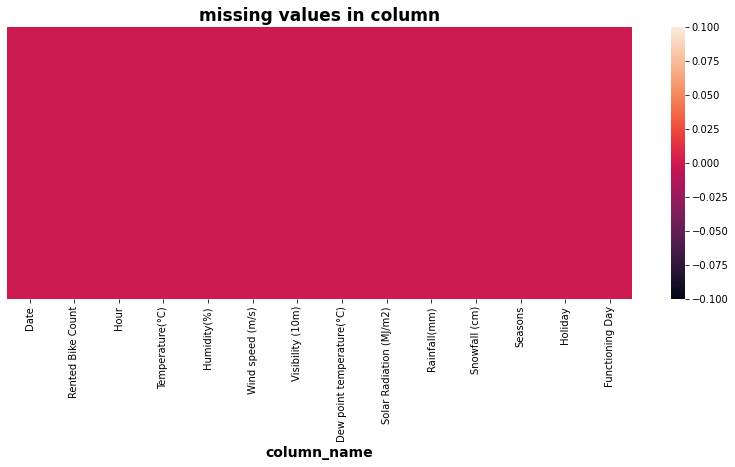

In [9]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [10]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [11]:
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [12]:
# Numeric Features

numeric_features= data.select_dtypes(exclude='object')

In [13]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data = data.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'wind speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew point temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall '
                       })

In [15]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [16]:
data.drop(columns=['Date'] ,axis=1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [17]:
# describing numeric feature

numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [18]:
#Extracting categorical features
categorical_features= data.select_dtypes(include='object')

In [19]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


# <b> Explonary Data Analysis

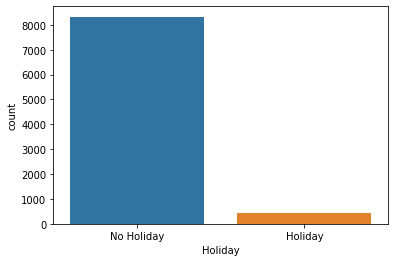

In [20]:
sns.countplot(x="Holiday", data=data)

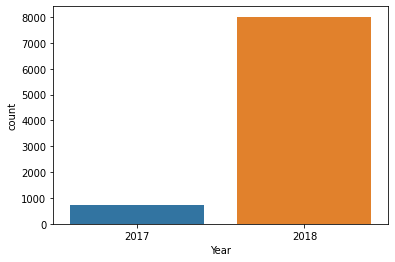

In [21]:
sns.countplot(x="Year", data=data)

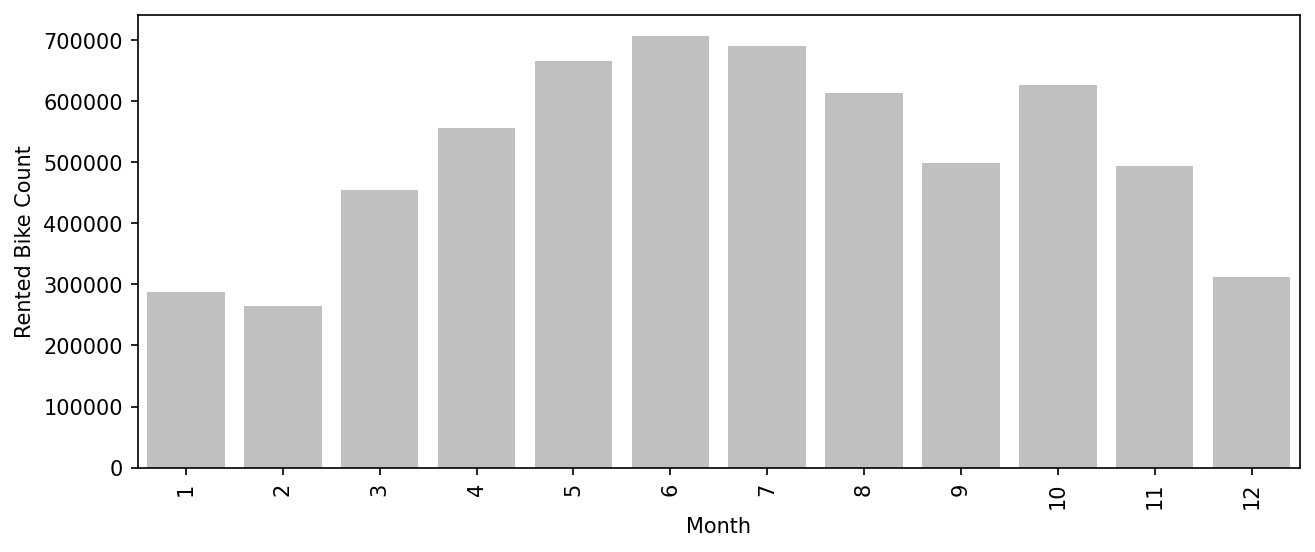

In [22]:
Month = data.groupby("Month").sum().reset_index()
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count",color="#c0c0c0", data=Month)
plt.xticks(rotation=90);

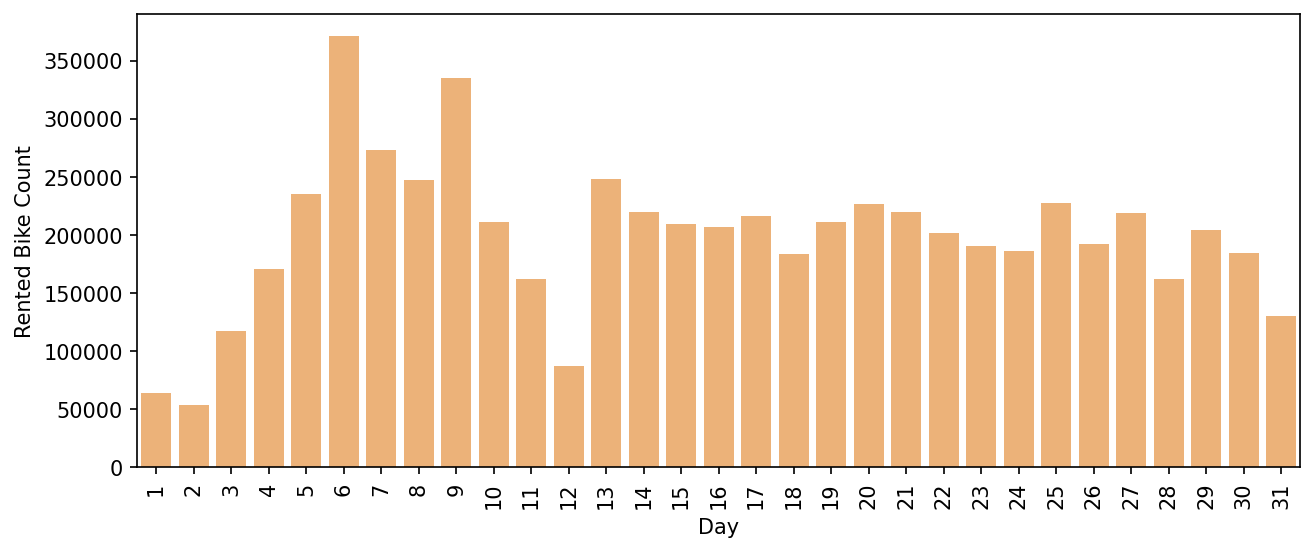

In [23]:
Day =data.groupby("Day").sum().reset_index()
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x="Day", y="Rented Bike Count",color='#ffb266', data=Day)
plt.xticks(rotation=90);

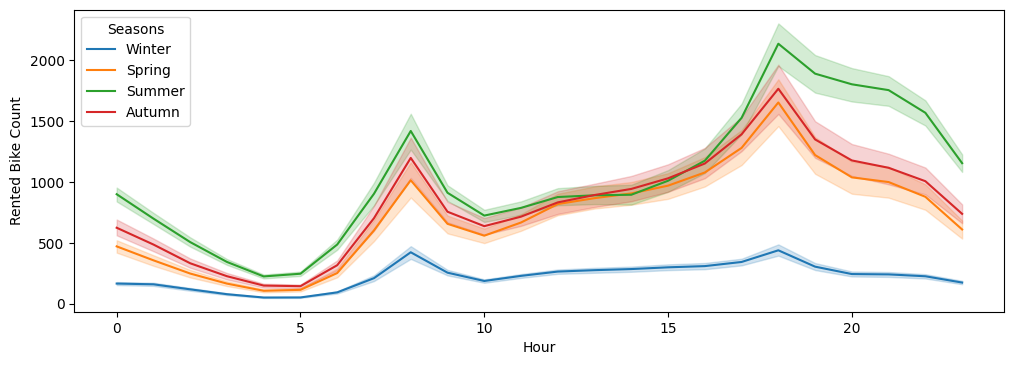

In [24]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=data, x="Hour", y="Rented Bike Count", hue="Seasons")

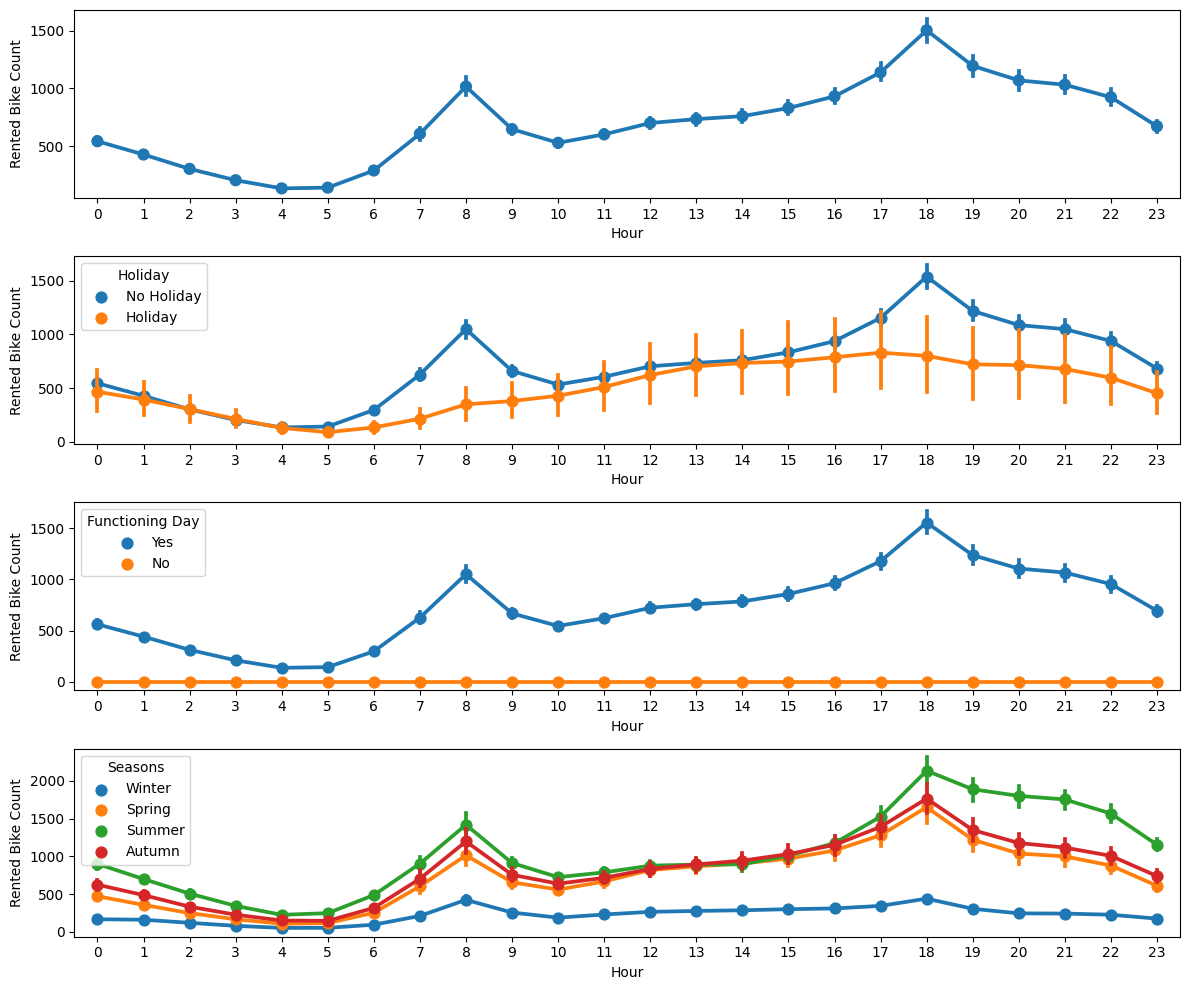

In [25]:
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Holiday")
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[2], 
              hue="Functioning Day")
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[3], 
              hue="Seasons")
plt.tight_layout()

In [29]:
data['Date'] = pd.to_datetime(data['Date'])

[Text(0.5, 1.0, 'Relation between humidity and users')]

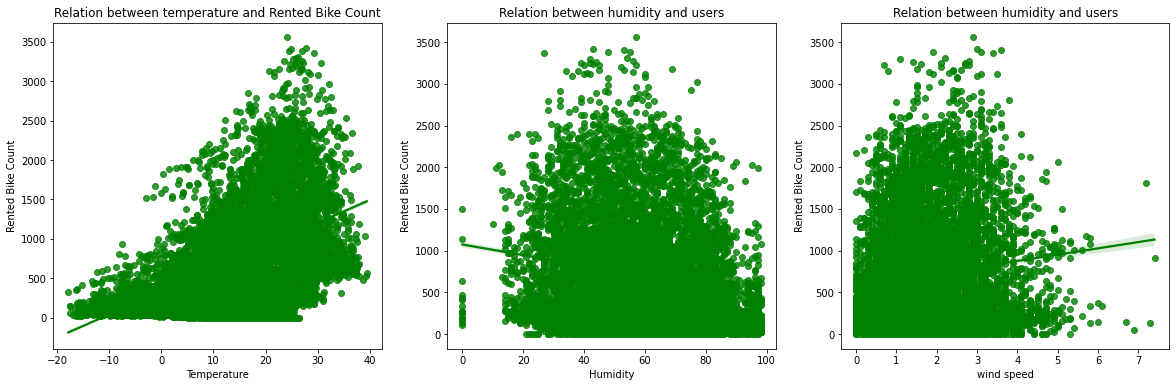

In [38]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=data['Temperature'], y=data['Rented Bike Count'], ax=ax1 ,color='green')
ax1.set(title="Relation between temperature and Rented Bike Count")
sns.regplot(x=data['Humidity'], y=data['Rented Bike Count'], ax=ax2, color='green')
ax2.set(title="Relation between humidity and users")
sns.regplot(x=data['wind speed'], y=data['Rented Bike Count'], ax=ax3, color='green')
ax3.set(title="Relation between humidity and users")

In [30]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


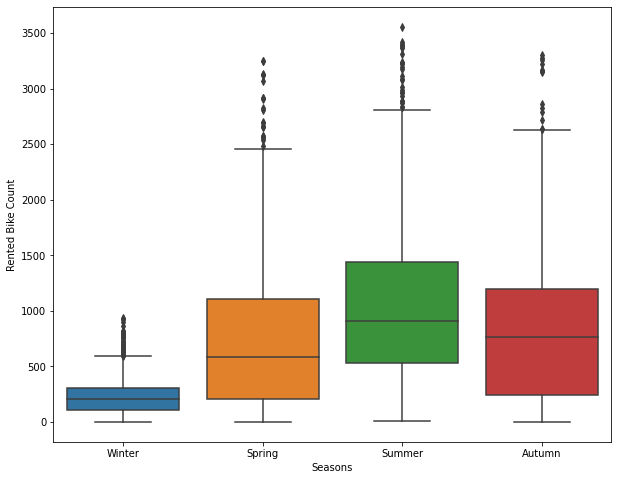

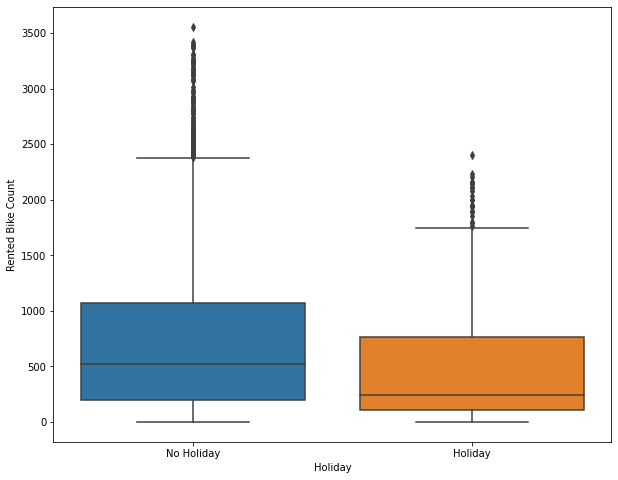

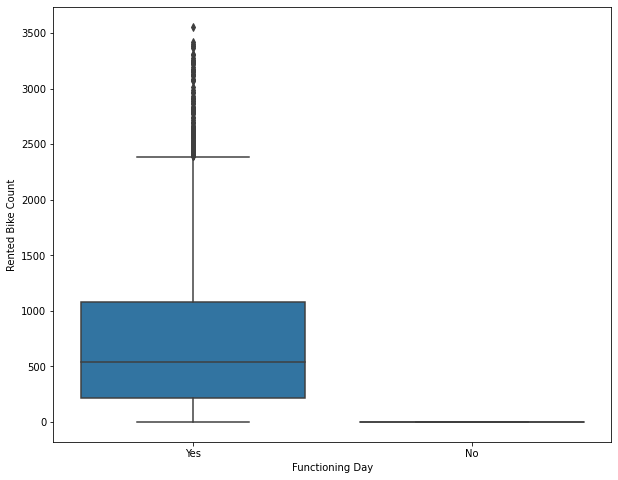

In [31]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=data[col],y=data["Rented Bike Count"])
  plt.show()

<Figure size 2000x1600 with 0 Axes>

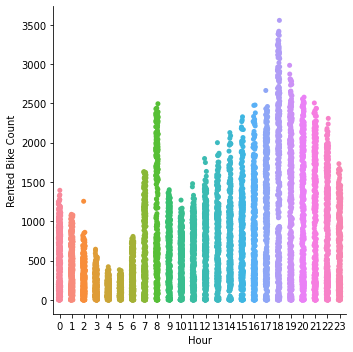

<Figure size 2000x1600 with 0 Axes>

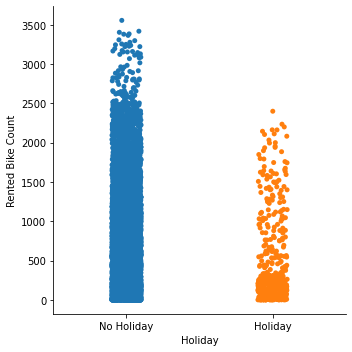

<Figure size 2000x1600 with 0 Axes>

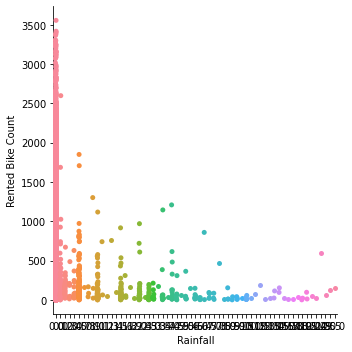

<Figure size 2000x1600 with 0 Axes>

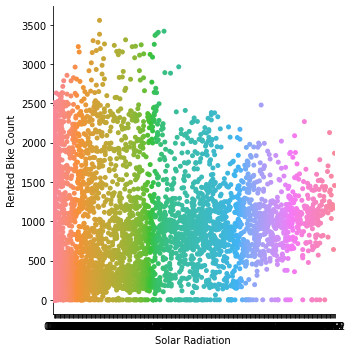

In [34]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall','Solar Radiation ']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=data)
  plt.show()

# ***Correlation Matrix***

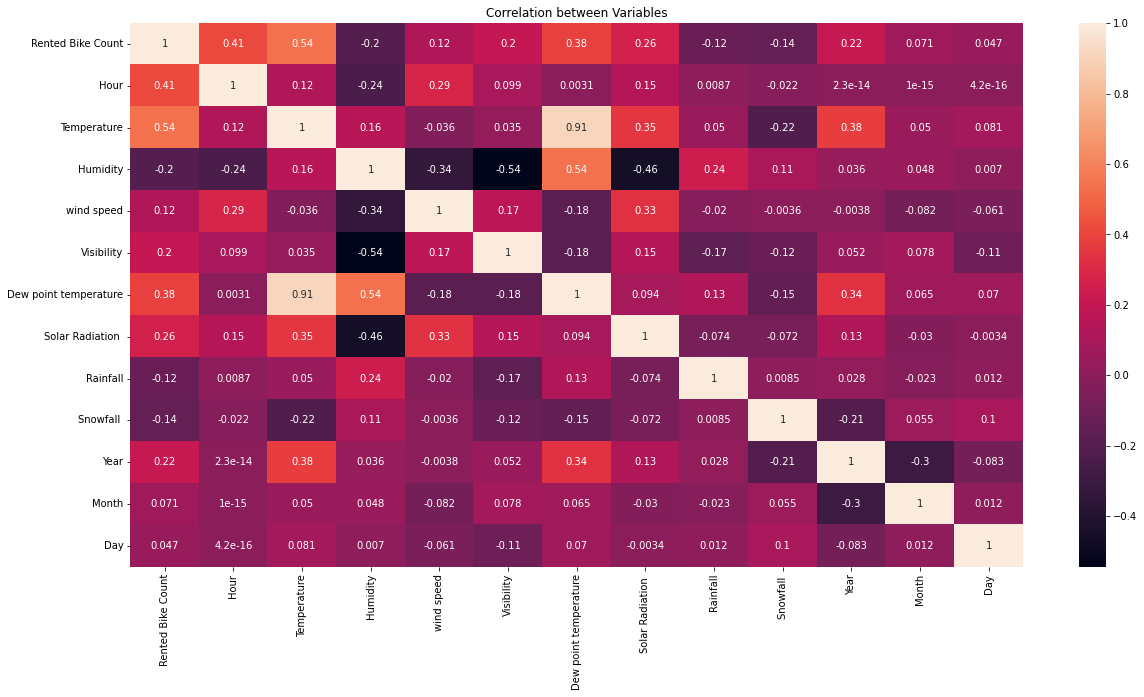

In [37]:
corr = data.corr()
corr


plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.title("Correlation between Variables")
plt.show()